In [10]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

# --- Load environment variables for file paths ---
load_dotenv(dotenv_path="/Users/sarah/Code/bioinformatics-tool/analysis/.env")

# Paths (change as needed or keep env system)
EXPRESSION_PARQUET ="/Users/sarah/Code/bioinformatics-tool/backend/data/parquet/filtered_top5000.parquet"  # Add this variable to your .env file!
CLINICAL_CSV = os.getenv("CLINICAL_LLM")

# --- 1. Load Data ---
expression_df = pd.read_parquet(EXPRESSION_PARQUET)   # genes as columns, samples as rows
clinical_df = pd.read_csv(CLINICAL_CSV, index_col=0)  # samples as rows, clinical features as columns

# --- 2. Align samples between dataframes ---
common_samples = expression_df.index.intersection(clinical_df.index)
expression_df = expression_df.loc[common_samples]
clinical_df = clinical_df.loc[common_samples]


Missing values per sample: 0    3409
Name: count, dtype: int64
Missing values per gene: 0    5000
Name: count, dtype: int64


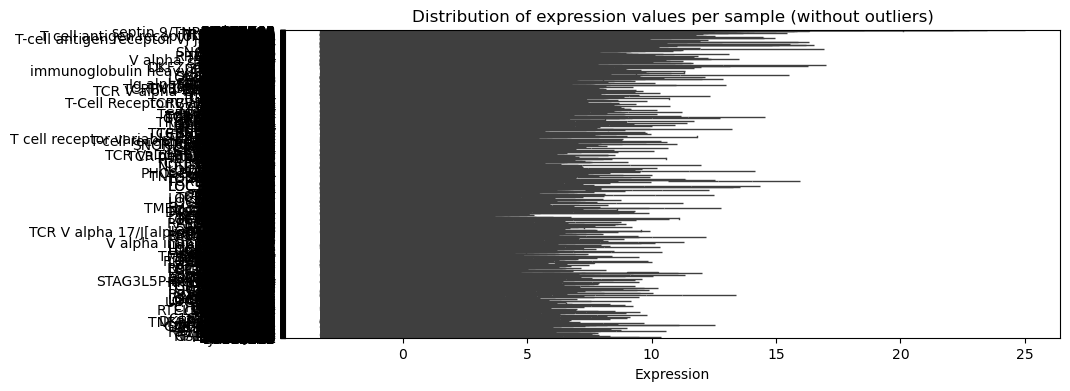

Text(0, 0.5, 'Number of genes')

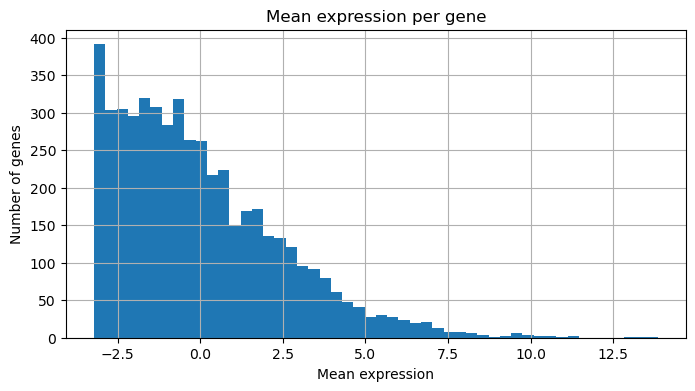

In [11]:
# Check for missing values
print("Missing values per sample:", expression_df.isnull().sum(axis=1).value_counts())
print("Missing values per gene:", expression_df.isnull().sum(axis=0).value_counts())

# Distribution of expression values per sample (boxplot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(data=expression_df, orient="h", showfliers=False)
plt.title("Distribution of expression values per sample (without outliers)")
plt.xlabel("Expression")
plt.show()

# Distribution of mean expression values per gene (histogram)
plt.figure(figsize=(8, 4))
expression_df.mean(axis=0).hist(bins=50)
plt.title("Mean expression per gene")
plt.xlabel("Mean expression")
plt.ylabel("Number of genes")

In [12]:
print("Min:", expression_df.values.min())
print("Max:", expression_df.values.max())
print("Mean:", expression_df.values.mean())
print("Standard deviation:", expression_df.values.std())

# Show the first few values
print("\nExample values (first 5 genes, first 5 samples):")
display(expression_df.iloc[:5, :5])

Min: -3.32192809488736
Max: 25.0000932158848
Mean: 0.0017206809294086167
Standard deviation: 3.1090636012340975

Example values (first 5 genes, first 5 samples):


,JC037706,DQ597485,DQ584545,DQ572382,DQ590013
F1,17.633315,-3.321928,19.483096,-3.321928,15.417223
F2,-3.321928,16.133985,16.226999,-3.321928,16.035529
F3,19.515425,17.489582,15.550615,-3.321928,17.489911
F4,19.172235,19.823524,-3.321928,17.637255,19.492859
F5,18.661987,-3.321928,14.907656,-3.321928,16.334092


# Check if Log Transformation was applied

Min: -3.32192809488736
Max: 25.0000932158848
Mean: 0.0017206809294086167
Standard deviation: 3.1090636012340975


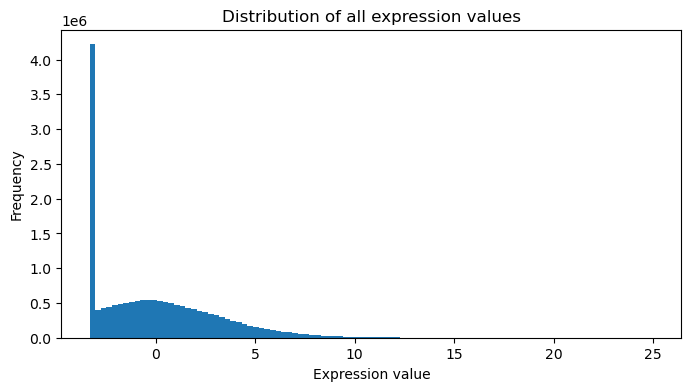

In [13]:
import matplotlib.pyplot as plt

print("Min:", expression_df.values.min())
print("Max:", expression_df.values.max())
print("Mean:", expression_df.values.mean())
print("Standard deviation:", expression_df.values.std())

plt.figure(figsize=(8, 4))
plt.hist(expression_df.values.flatten(), bins=100)
plt.title("Distribution of all expression values")
plt.xlabel("Expression value")
plt.ylabel("Frequency")
plt.show()

Most likely log-transformed

First 10 gene medians: JC037706    17.478368
DQ597485    16.741824
DQ584545    -3.321928
DQ572382    -3.321928
DQ590013    17.248327
DQ584699    -3.321928
KF274566    -3.321928
Histone3    -3.321928
SNORD81     -3.321928
DQ580854    -3.321928
dtype: float64
0 out of 5000 genes have a median close to 0 (tolerance 1e-06)


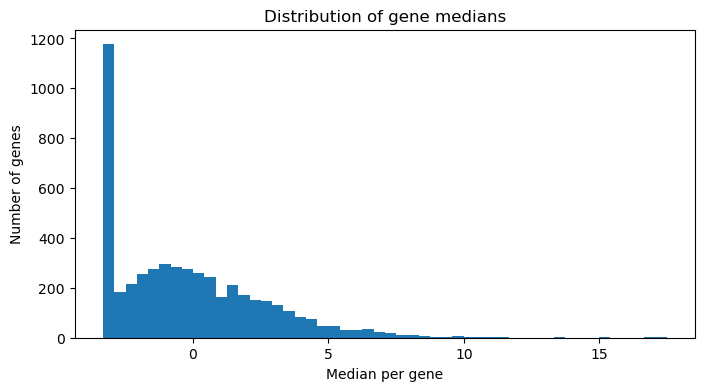

In [14]:
medians = expression_df.median(axis=0)
print("First 10 gene medians:", medians.head(10))

tolerance = 1e-6
centered = (medians.abs() < tolerance).sum()
print(f"{centered} out of {len(medians)} genes have a median close to 0 (tolerance {tolerance})")

plt.figure(figsize=(8, 4))
plt.hist(medians, bins=50)
plt.title("Distribution of gene medians")
plt.xlabel("Median per gene")
plt.ylabel("Number of genes")
plt.show()

First 10 gene medians after centering: JC037706    0.0
DQ597485    0.0
DQ584545    0.0
DQ572382    0.0
DQ590013    0.0
DQ584699    0.0
KF274566    0.0
Histone3    0.0
SNORD81     0.0
DQ580854    0.0
dtype: float64
5000 out of 5000 genes now have a median close to 0 (tolerance 1e-06)


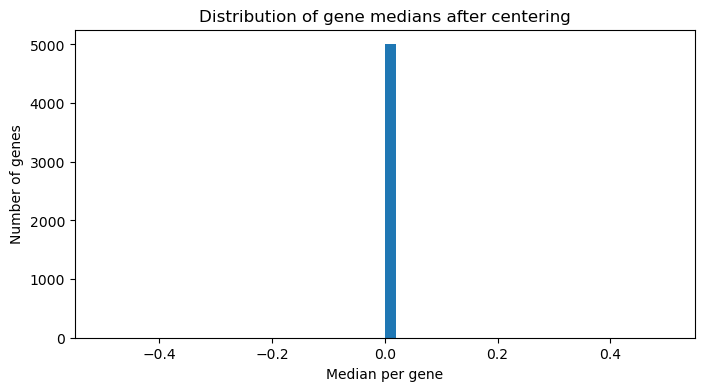

In [15]:
# Median centering per gene (column)
expression_centered = expression_df - expression_df.median(axis=0)

# Check the result
medians_centered = expression_centered.median(axis=0)
print("First 10 gene medians after centering:", medians_centered.head(10))

tolerance = 1e-6
centered = (medians_centered.abs() < tolerance).sum()
print(f"{centered} out of {len(medians_centered)} genes now have a median close to 0 (tolerance {tolerance})")

plt.figure(figsize=(8, 4))
plt.hist(medians_centered, bins=50)
plt.title("Distribution of gene medians after centering")
plt.xlabel("Median per gene")
plt.ylabel("Number of genes")
plt.show()

In [16]:
print("All values zero?", (expression_centered == 0).all().all())
print("First 5 rows:")
display(expression_centered.head())

All values zero? False
First 5 rows:


,JC037706,DQ597485,DQ584545,DQ572382,DQ590013,DQ584699,KF274566,Histone3,SNORD81,DQ580854,...,C16orf98,GPRASP2,CKAP2L,MTCL1,SUCNR1,JB242119,BC042070,RORB,PCSK2,AK126266
F1,0.154948,-20.063752,22.805024,0.000000,-1.831104,0.0,0.000000,13.601283,14.449052,0.0,...,0.292173,-1.883189,0.838562,-0.166751,1.749961,-0.956334,0.199294,-1.686674,-0.100916,-2.828377
F2,-20.800296,-0.607839,19.548927,0.000000,-1.212798,0.0,0.000000,0.000000,0.000000,0.0,...,-0.020819,-0.085335,-0.345236,0.211198,-1.317807,-0.415650,-0.464454,0.814373,-0.245608,0.162843
F3,2.037057,0.747758,18.872543,0.000000,0.241584,0.0,0.000000,0.000000,0.000000,0.0,...,-0.887725,0.738574,1.751961,-0.526000,-0.326732,-1.194229,0.406123,-1.686674,0.125337,-1.295871
F4,1.693867,3.081701,0.000000,20.959183,2.244532,0.0,0.000000,13.139481,8.608414,0.0,...,-0.480822,0.483325,0.995186,0.530396,0.758642,1.858080,-0.718146,0.106231,0.058333,-0.973226
F5,1.183620,-20.063752,18.229584,0.000000,-0.914235,0.0,13.771386,0.000000,0.000000,0.0,...,-0.271042,2.128903,-2.715800,1.581476,0.144669,-0.806914,-1.183594,0.832633,1.843249,0.121959


# PCA

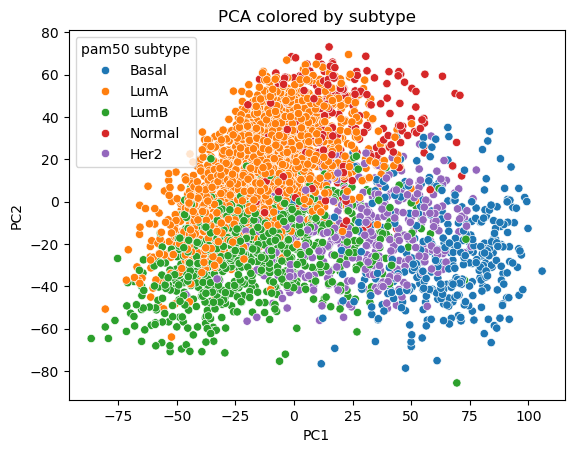

In [17]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(expression_centered)

# Combine with clinical data
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=expression_centered.index)
pca_df = pca_df.join(clinical_df)

# Try to find a subtype column (adjust as needed)
subtype_col = [col for col in clinical_df.columns if "subtype" in col.lower()]
if subtype_col:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=subtype_col[0])
    plt.title("PCA colored by subtype")
    plt.show()
else:
    print("No subtype column found in clinical data.")

In [18]:
print("Explained variance ratio (first 5 PCs):", pca.explained_variance_ratio_[:5])
print("Total variance explained by PC1+PC2:", pca.explained_variance_ratio_[:2].sum())

Explained variance ratio (first 5 PCs): [0.06655564 0.04668416]
Total variance explained by PC1+PC2: 0.11323980624794999


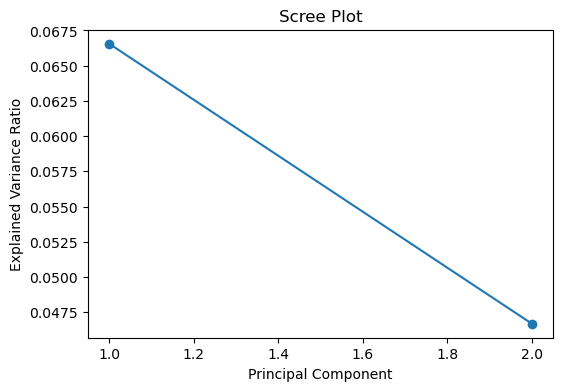

In [20]:
import matplotlib.pyplot as plt

n_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [21]:
print("Clinical columns:", clinical_df.columns.tolist())

Clinical columns: ['last_update_date', 'instrument model', 'age at diagnosis', 'tumor size', 'lymph node group', 'lymph node status', 'er status', 'pgr status', 'her2 status', 'ki67 status', 'nhg', 'pam50 subtype', 'overall survival days', 'overall survival event', 'endocrine treated', 'chemo treated']


In [22]:
batch_col = [col for col in clinical_df.columns if "batch" in col.lower() or "center" in col.lower() or "plate" in col.lower() or "run" in col.lower()]
if batch_col:
    colname = batch_col[0]
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=colname)
    plt.title(f"PCA colored by {colname}")
    plt.show()
else:
    print("No obvious batch/confounder column found.")

No obvious batch/confounder column found.


In [23]:
if batch_col:
    colname = batch_col[0]
    # For categorical batch variables
    import scipy.stats as stats
    for pc in ["PC1", "PC2"]:
        groups = [pca_df[pc][pca_df[colname] == val] for val in pca_df[colname].unique()]
        stat, p = stats.f_oneway(*groups)
        print(f"ANOVA p-value for {pc} ~ {colname}: {p:.3g}")

# t-SNE

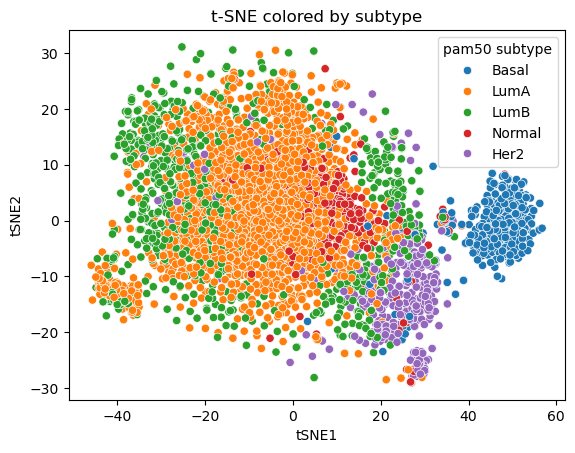

In [24]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(expression_centered)
tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"], index=expression_centered.index)
tsne_df = tsne_df.join(clinical_df)
import seaborn as sns
sns.scatterplot(data=tsne_df, x="tSNE1", y="tSNE2", hue=subtype_col[0])
plt.title("t-SNE colored by subtype")
plt.show()

# UMAP

/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


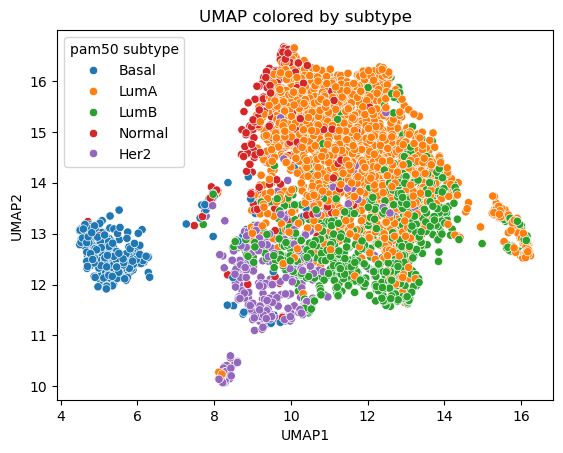

In [27]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(expression_centered)
umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"], index=expression_centered.index)
umap_df = umap_df.join(clinical_df)

# Plot UMAP colored by subtype
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue=subtype_col[0])
plt.title("UMAP colored by subtype")
plt.show()

/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


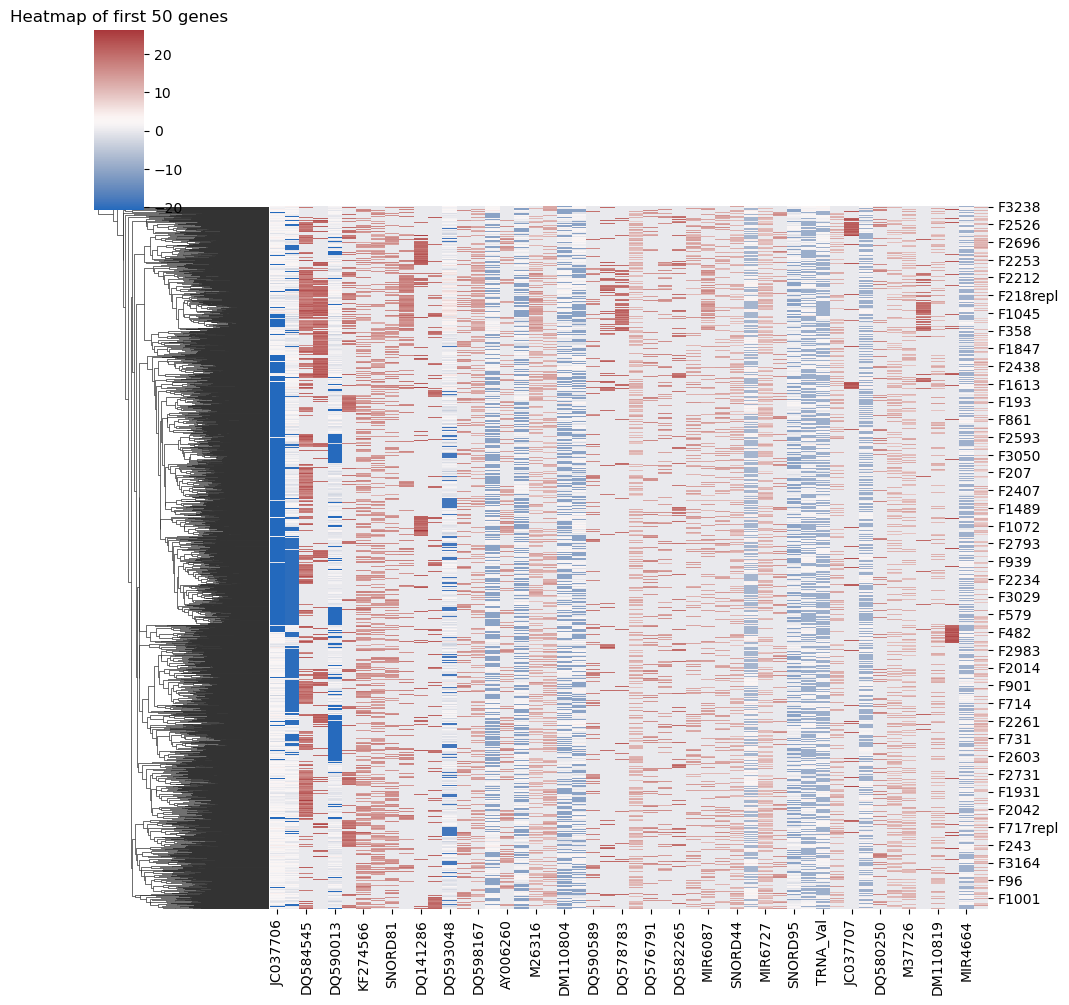

In [25]:
import seaborn as sns
sns.clustermap(expression_centered.iloc[:, :50], metric="correlation", cmap="vlag", col_cluster=False)
plt.title("Heatmap of first 50 genes")
plt.show()

# Differential Expression Analysis

In [38]:
from scipy.stats import ttest_ind
import pandas as pd

# Get group labels
group1 = expression_centered[clinical_df[subtype_col[0]] == "LumA"]
group2 = expression_centered[clinical_df[subtype_col[0]] == "Basal"]

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2, axis=0, nan_policy='omit')

# Create a DataFrame with results
de_results = pd.DataFrame({
    "gene": expression_centered.columns,
    "t_stat": t_stat,
    "p_value": p_val
}).set_index("gene")

# Adjust p-values (optional, for multiple testing)
from statsmodels.stats.multitest import multipletests
de_results["p_adj"] = multipletests(de_results["p_value"], method="fdr_bh")[1]

# Show top 10 DE genes
print(de_results.sort_values("p_value").head(10))

             t_stat  p_value  p_adj
gene                               
MYBL2    -47.280937      0.0    0.0
MLPH      85.659275      0.0    0.0
C9orf152  58.731107      0.0    0.0
NME5      48.053546      0.0    0.0
GATA3     79.266669      0.0    0.0
ZMYND10   60.720354      0.0    0.0
C4A       47.407095      0.0    0.0
IL6ST     51.946988      0.0    0.0
PRR15     71.700756      0.0    0.0
ART3     -51.985456      0.0    0.0


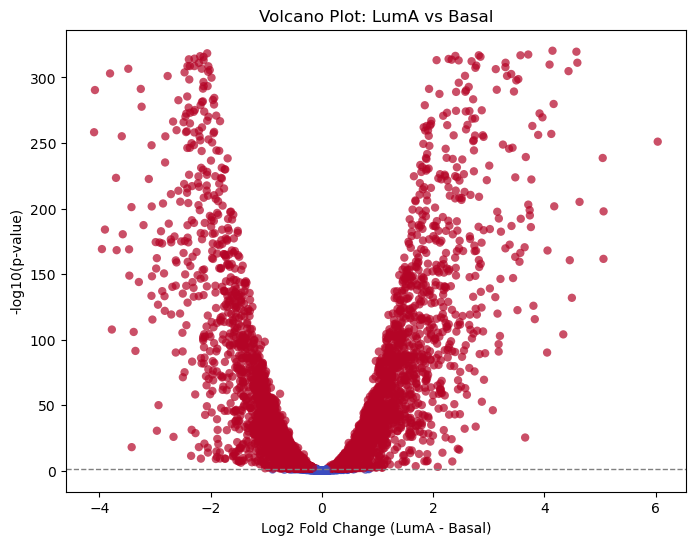

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate log2 fold change
mean1 = group1.mean(axis=0)
mean2 = group2.mean(axis=0)
de_results["log2FC"] = mean1 - mean2  # Since data is log-transformed, difference = log2FC

# Volcano plot
plt.figure(figsize=(8,6))
plt.scatter(de_results["log2FC"], -np.log10(de_results["p_value"]), 
            c=(de_results["p_adj"] < 0.05), cmap="coolwarm", alpha=0.7, edgecolor='none')
plt.xlabel("Log2 Fold Change (LumA - Basal)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot: LumA vs Basal")
plt.axhline(-np.log10(0.05), color='grey', linestyle='--', lw=1)
plt.show()

/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


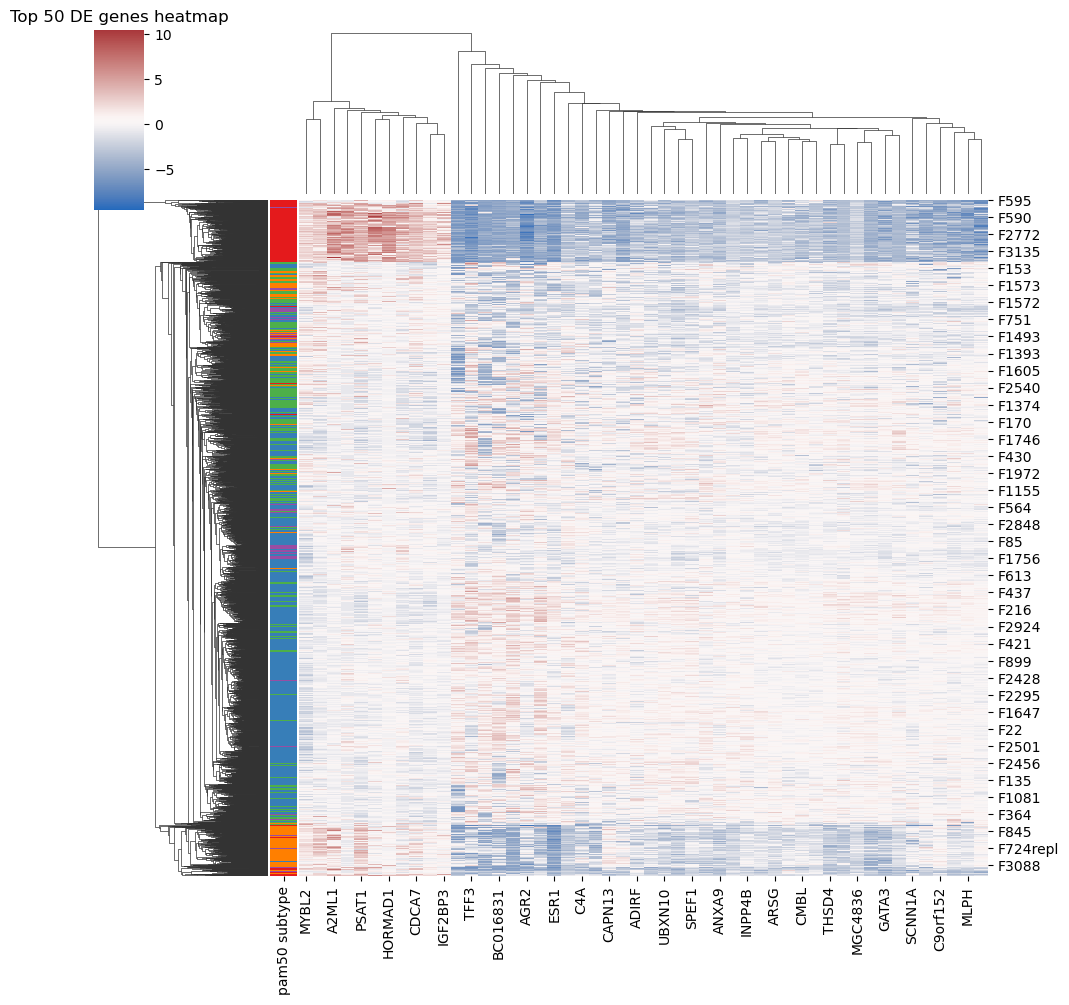

In [41]:
import seaborn as sns

# Map subtypes to colors
subtype_palette = sns.color_palette("Set1", n_colors=clinical_df[subtype_col[0]].nunique())
subtype_lut = dict(zip(clinical_df[subtype_col[0]].unique(), subtype_palette))
row_colors = clinical_df[subtype_col[0]].map(subtype_lut)

top_genes = de_results.sort_values("p_value").head(50).index
sns.clustermap(expression_centered[top_genes], row_colors=row_colors, cmap="vlag")
plt.title("Top 50 DE genes heatmap")
plt.show()

             t_stat        p_value          p_adj    log2FC
gene                                                       
PTTG1    -45.677274   0.000000e+00   0.000000e+00 -1.491769
AURKA    -44.386631  5.007616e-317  1.138607e-313 -1.450407
BIRC5    -44.374067  6.831640e-317  1.138607e-313 -1.763590
FOXM1    -44.312492  3.130052e-316  3.912565e-313 -1.523410
AF086186 -43.950550  2.393176e-312  2.393176e-309 -1.827136
TROAP    -43.900123  8.312260e-312  6.926883e-309 -1.818503
UBE2C    -43.591433  1.691314e-308  1.208082e-305 -1.867324
CDCA5    -42.917086  2.785791e-301  1.741120e-298 -1.414853
TPX2     -42.803535  4.555999e-300  2.531110e-297 -1.482671
E2F1     -42.788391  6.613117e-300  3.306559e-297 -1.513576


/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


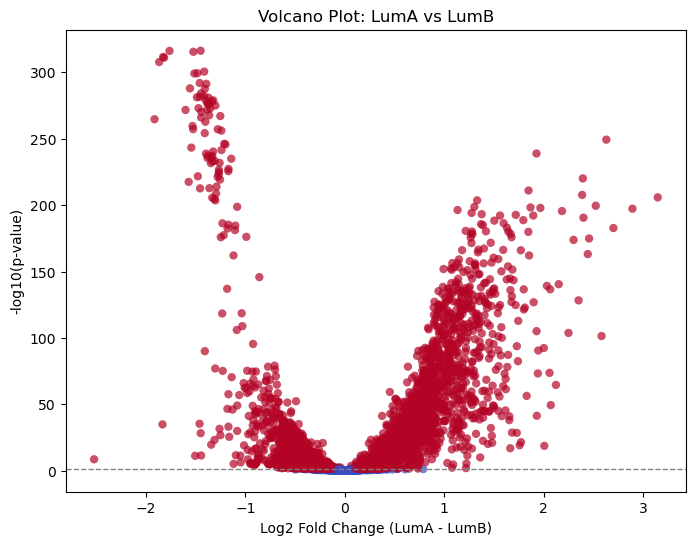

In [42]:
# Differential Expression: LumA vs LumB

# Get group labels
group1 = expression_centered[clinical_df[subtype_col[0]] == "LumA"]
group2 = expression_centered[clinical_df[subtype_col[0]] == "LumB"]

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2, axis=0, nan_policy='omit')

# Create a DataFrame with results
de_results = pd.DataFrame({
    "gene": expression_centered.columns,
    "t_stat": t_stat,
    "p_value": p_val
}).set_index("gene")

# Adjust p-values (optional, for multiple testing)
from statsmodels.stats.multitest import multipletests
de_results["p_adj"] = multipletests(de_results["p_value"], method="fdr_bh")[1]

# Calculate log2 fold change
mean1 = group1.mean(axis=0)
mean2 = group2.mean(axis=0)
de_results["log2FC"] = mean1 - mean2  # log2FC: LumA - LumB

# Show top 10 DE genes
print(de_results.sort_values("p_value").head(10))

# Volcano plot
plt.figure(figsize=(8,6))
plt.scatter(de_results["log2FC"], -np.log10(de_results["p_value"]), 
            c=(de_results["p_adj"] < 0.05), cmap="coolwarm", alpha=0.7, edgecolor='none')
plt.xlabel("Log2 Fold Change (LumA - LumB)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot: LumA vs LumB")
plt.axhline(-np.log10(0.05), color='grey', linestyle='--', lw=1)
plt.show()

/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


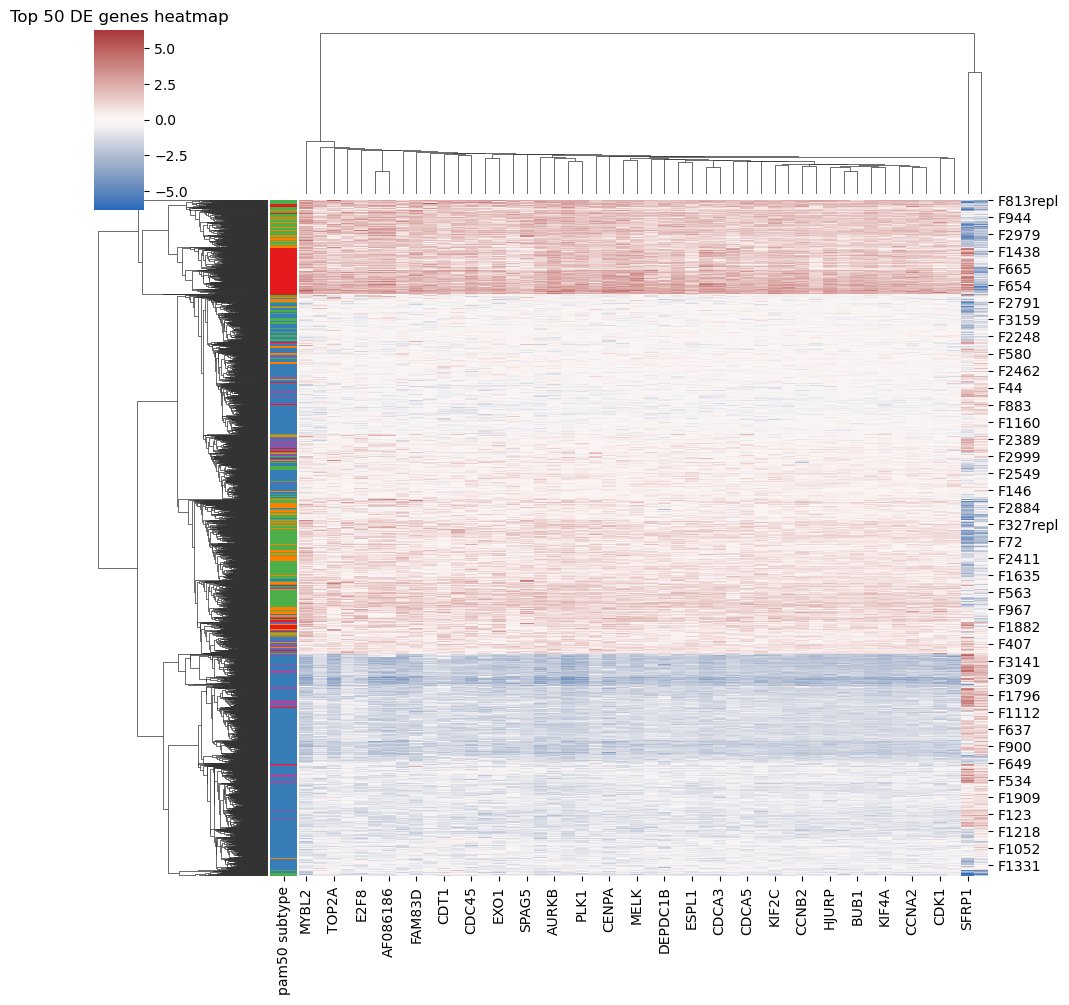

In [43]:
import seaborn as sns

# Map subtypes to colors
subtype_palette = sns.color_palette("Set1", n_colors=clinical_df[subtype_col[0]].nunique())
subtype_lut = dict(zip(clinical_df[subtype_col[0]].unique(), subtype_palette))
row_colors = clinical_df[subtype_col[0]].map(subtype_lut)

top_genes = de_results.sort_values("p_value").head(50).index
sns.clustermap(expression_centered[top_genes], row_colors=row_colors, cmap="vlag")
plt.title("Top 50 DE genes heatmap")
plt.show()

# Correlation Matrix with Gene Expression

In [44]:
import scipy.stats as stats

# Select numeric clinical variables (excluding index/object types)
numeric_cols = clinical_df.select_dtypes(include=[np.number]).columns

# Correlate each gene with each numeric clinical variable
cor_results = []
for clin_var in numeric_cols:
    for gene in expression_centered.columns:
        # Drop missing values for this pair
        valid = ~clinical_df[clin_var].isnull()
        if valid.sum() > 2:  # Need at least 3 samples
            r, p = stats.pearsonr(expression_centered.loc[valid, gene], clinical_df.loc[valid, clin_var])
            cor_results.append({"gene": gene, "clinical_var": clin_var, "pearson_r": r, "p_value": p})

cor_df = pd.DataFrame(cor_results)

# Show top correlations (by absolute value)
print(cor_df.reindex(cor_df.pearson_r.abs().sort_values(ascending=False).index).head(10))

           gene       clinical_var  pearson_r        p_value
29797     MIEN1        her2 status   0.699960   0.000000e+00
27745     ERBB2        her2 status   0.695238   0.000000e+00
27701      GRB7        her2 status   0.678296   0.000000e+00
15666      ESR1          er status   0.660408   0.000000e+00
16677     GATA3          er status   0.632324   0.000000e+00
15404      AGR3          er status   0.626108   0.000000e+00
16075     FOXA1          er status   0.606529  8.794368e-320
16403  BC070495          er status   0.603640  5.792070e-316
16290      CA12          er status   0.603564  7.295439e-316
45666      ESR1  endocrine treated   0.593493  1.541485e-321
